In [1]:
#TODOS LOS IMPORT

import pandas as pd
import numpy as np

# IMPORTAMOS SKLEARN PARA HACER EL SPLIT PARA EL ENTRENAMIENTO Y TESTEO
# USAMOS LA MATRIZ DE CONFUSION PARA SACAR METRICAS
# USAMOS EL ALGORITMO DE RANDOM FOREST QUE SE USARA PARA PREDECIR
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor

# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

#IMPORT PARA LA CURVA AUC-ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

# graficos incrustados
%matplotlib inline

#PARA ESTANDARIZAR LOS DATOS
from sklearn import preprocessing

#PARA LAS METRICAS
from sklearn.metrics import recall_score


In [2]:
#FUNCION A REALIZAR PARA CALCULAR LAS METRICAS DESEADAS
#ESTA HECHA A MEDIAS ES PARA TESTEAR
def evaluate(matrix, metric):
    tn=matrix[0][0]*1.0
    tp=matrix[1][1]*1.0
    fp=matrix[0][1]*1.0
    fn=matrix[1][0]*1.0
    total= tn+tp+fp+fn
    accuracy=(tp+tn)/total
    print "CONFUSION MATRIX"
    print "  TN     FP"
    print "  FN     TP"
    print matrix
    print('Model Performance')
    print('Accuracy = {:0.4f}%.'.format(accuracy))
    
    return accuracy

In [12]:
features_under_sample=pd.read_csv('under_sample.csv')
features=features_under_sample.iloc[:,1:]
features=features.iloc[:,:-1]
feature_list = list(features.columns)
features.head()

,Enero - cantidadEventos,Enero - checkouts,Enero - leads,Enero - conversiones,Enero - staticPageVisitadas,Enero - ProductosVistosPorUser,Enero - productosBuscados,Enero - accesos por marketing online,Enero - searchEngine,Enero - accesos a la homepage,...,Mayo - checkouts,Mayo - leads,Mayo - conversiones,Mayo - staticPageVisitadas,Mayo - ProductosVistosPorUser,Mayo - productosBuscados,Mayo - accesos por marketing online,Mayo - searchEngine,Mayo - accesos a la homepage,Mayo - listadosVisitados
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
#APLICO LOG+1 PARA SALVAR LOS 0 Y NO DE NaN SOBRE EL DF
features=np.log(features+1)
print features.shape
features.head()

(1960, 55)


,Enero - cantidadEventos,Enero - checkouts,Enero - leads,Enero - conversiones,Enero - staticPageVisitadas,Enero - ProductosVistosPorUser,Enero - productosBuscados,Enero - accesos por marketing online,Enero - searchEngine,Enero - accesos a la homepage,...,Mayo - checkouts,Mayo - leads,Mayo - conversiones,Mayo - staticPageVisitadas,Mayo - ProductosVistosPorUser,Mayo - productosBuscados,Mayo - accesos por marketing online,Mayo - searchEngine,Mayo - accesos a la homepage,Mayo - listadosVisitados
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.693147,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.693147,0.693147
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [14]:
#NORMALIZO EL DF Y VERIFICO QUE NO HAYA NaN
from sklearn import preprocessing

# Get column names first
names = features.columns

# Create the Scaler object
scaler = preprocessing.StandardScaler()

# Fit your data on the scaler object
scaled_df = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_df, columns=names)
print scaled_df.shape
features=scaled_df
features_under_sample_std=scaled_df
print ("Hay Null: ",features.isnull().values.any())
scaled_df.head()

(1960, 55)
('Hay Null: ', False)


,Enero - cantidadEventos,Enero - checkouts,Enero - leads,Enero - conversiones,Enero - staticPageVisitadas,Enero - ProductosVistosPorUser,Enero - productosBuscados,Enero - accesos por marketing online,Enero - searchEngine,Enero - accesos a la homepage,...,Mayo - checkouts,Mayo - leads,Mayo - conversiones,Mayo - staticPageVisitadas,Mayo - ProductosVistosPorUser,Mayo - productosBuscados,Mayo - accesos por marketing online,Mayo - searchEngine,Mayo - accesos a la homepage,Mayo - listadosVisitados
0,-0.224606,-0.122468,-0.03196,0.0,-0.06981,-0.096353,-0.070083,-0.074372,-0.184929,-0.174625,...,-1.079574,-0.077565,-0.068962,-0.288466,-0.32765,-0.224743,-0.235422,0.208686,-0.866207,-0.736821
1,-0.224606,-0.122468,-0.03196,0.0,-0.06981,-0.096353,-0.070083,-0.074372,-0.184929,-0.174625,...,0.488571,-0.077565,-0.068962,-0.288466,-0.32765,-0.224743,-0.235422,0.208686,0.194176,-0.736821
2,-0.224606,-0.122468,-0.03196,0.0,-0.06981,-0.096353,-0.070083,-0.074372,-0.184929,-0.174625,...,-1.079574,-0.077565,-0.068962,-0.288466,-0.32765,-0.224743,-0.235422,-1.066898,-0.866207,-0.736821
3,-0.224606,-0.122468,-0.03196,0.0,-0.06981,-0.096353,-0.070083,-0.074372,-0.184929,-0.174625,...,-1.079574,-0.077565,-0.068962,-0.288466,-0.32765,-0.224743,-0.235422,0.208686,0.194176,0.459011
4,-0.224606,-0.122468,-0.03196,0.0,-0.06981,-0.096353,-0.070083,-0.074372,-0.184929,-0.174625,...,-1.079574,-0.077565,-0.068962,-0.288466,-0.32765,-0.224743,-0.235422,-1.066898,-0.866207,-0.736821


In [15]:
features_test_set=pd.read_csv('testSet.csv')
#LE QUITO A T LA COLUMNA PERSON
T = features_test_set.iloc[:,1:]
T.head()

,Enero_cantEventos,Enero_checkouts,Enero_leads,Enero_conversiones,Enero_staticPageVisitadas,Enero_ProductosVistosPorUser,Enero_productosBuscados,Enero_accesos por marketing online,Enero_searchEngine,Enero_accesos a la homepage,...,Mayo_checkouts,Mayo_leads,Mayo_conversiones,Mayo_staticPageVisitadas,Mayo_ProductosVistosPorUser,Mayo_productosBuscados,Mayo_accesos por marketing online,Mayo_searchEngine,Mayo_accesos a la homepage,Mayo_listadosVisitados
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,2.0


In [16]:
#APLICO LOG A T
T=np.log(T+1)
T.head()

,Enero_cantEventos,Enero_checkouts,Enero_leads,Enero_conversiones,Enero_staticPageVisitadas,Enero_ProductosVistosPorUser,Enero_productosBuscados,Enero_accesos por marketing online,Enero_searchEngine,Enero_accesos a la homepage,...,Mayo_checkouts,Mayo_leads,Mayo_conversiones,Mayo_staticPageVisitadas,Mayo_ProductosVistosPorUser,Mayo_productosBuscados,Mayo_accesos por marketing online,Mayo_searchEngine,Mayo_accesos a la homepage,Mayo_listadosVisitados
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.098612,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.386294,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,1.386294,1.386294
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,1.386294,0.693147,1.609438
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,1.098612,1.609438,1.098612


In [17]:
#ESTANDARIZO T Y VERIFICO QUE NO HAYA NaN
from sklearn import preprocessing

# Get column names first
names = T.columns

# Create the Scaler object
scaler = preprocessing.StandardScaler()

# Fit your data on the scaler object
scaled_df = scaler.fit_transform(T)
scaled_df = pd.DataFrame(scaled_df, columns=names)
print scaled_df.shape
T=scaled_df
scaled_df.head()
print ("Hay Null: ",scaled_df.isnull().values.any())
T.head()

(19415, 55)
('Hay Null: ', False)


,Enero_cantEventos,Enero_checkouts,Enero_leads,Enero_conversiones,Enero_staticPageVisitadas,Enero_ProductosVistosPorUser,Enero_productosBuscados,Enero_accesos por marketing online,Enero_searchEngine,Enero_accesos a la homepage,...,Mayo_checkouts,Mayo_leads,Mayo_conversiones,Mayo_staticPageVisitadas,Mayo_ProductosVistosPorUser,Mayo_productosBuscados,Mayo_accesos por marketing online,Mayo_searchEngine,Mayo_accesos a la homepage,Mayo_listadosVisitados
0,-0.166234,-0.092164,-0.037244,-0.018991,-0.045747,-0.072921,-0.053405,-0.062351,-0.1434,-0.129406,...,1.342945,-0.0766,-0.060362,-0.281469,-0.303025,-0.208992,-0.213287,-1.058029,-0.823290,-0.667289
1,-0.166234,-0.092164,-0.037244,-0.018991,-0.045747,-0.072921,-0.053405,-0.062351,-0.1434,-0.129406,...,-1.802699,-0.0766,-0.060362,-0.281469,-0.303025,-0.208992,-0.213287,-1.058029,-0.823290,-0.667289
2,-0.166234,-0.092164,-0.037244,-0.018991,-0.045747,-0.072921,-0.053405,-0.062351,-0.1434,-0.129406,...,2.166661,-0.0766,-0.060362,-0.281469,-0.303025,-0.208992,-0.213287,0.288146,1.496223,1.992088
3,-0.166234,-0.092164,-0.037244,-0.018991,-0.045747,-0.072921,-0.053405,-0.062351,-0.1434,-0.129406,...,0.181981,-0.0766,-0.060362,-0.281469,-0.303025,-0.208992,-0.213287,1.634322,0.336466,2.420152
4,-0.166234,-0.092164,-0.037244,-0.018991,-0.045747,-0.072921,-0.053405,-0.062351,-0.1434,-0.129406,...,0.181981,-0.0766,-0.060362,-0.281469,-0.303025,-0.208992,-0.213287,1.075609,1.869581,1.440217


In [18]:
# LO CONVIERTO FEATURES A UN ARREGLO DE NUMPY AL IGUAL QUE LOS LABELS
features = np.array(features)
print ("DIMENSIONES DE FEATURES: ",features.shape)

T = np.array(T)

labels = np.array(features_under_sample['label'])
print ("DIMENSIONES DE LABELS: ",labels.shape)
print ("DIMENSIONES DE T: ",T.shape)

('DIMENSIONES DE FEATURES: ', (1960L, 55L))
('DIMENSIONES DE LABELS: ', (1960L,))
('DIMENSIONES DE T: ', (19415L, 55L))


In [19]:
# REALIZO EL SPLIT DE LA INFO DE LOS DATOS PARA ENTRENAR Y TESTEAR
#train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
train_features, test_features, train_labels, test_labels =train_test_split(features,labels,test_size = 0.4,shuffle = False)


print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

# INSTANCIAMOS EL MODELO CON 1000 ARBOLES DE DESICION
rfr = RandomForestRegressor(n_estimators = 100000, random_state = 42, max_depth = 7)

# ENTRENAMOS EL MODELO CON LOS DATOS
rfr.fit(train_features, train_labels)

# TOMAMOS LA IMPORTANCIA NUMERICA DE LOS FEATURES
importances = list(rfr.feature_importances_)

# USAMOS EL MODELO PARA PREDECIR
predictions = rfr.predict(test_features)
prediction_round= np.around(predictions)
#print prediction_round

# GENERAMOS LA MATRIZ DE CONFUSION
conf_mat = confusion_matrix(test_labels, np.around(predictions))

#CORREMOS NUESTRA FUNCION DE EVALUACION
evaluate(conf_mat,"Accuracy")

print("RECALL: ",recall_score(test_labels,prediction_round))


('Training Features Shape:', (1176L, 55L))
('Training Labels Shape:', (1176L,))
('Testing Features Shape:', (784L, 55L))
('Testing Labels Shape:', (784L,))
CONFUSION MATRIX
  TN     FP
  FN     TP
[[302  99]
 [ 82 301]]
Model Performance
Accuracy = 0.7691%.
('RECALL: ', 0.78590078328981727)


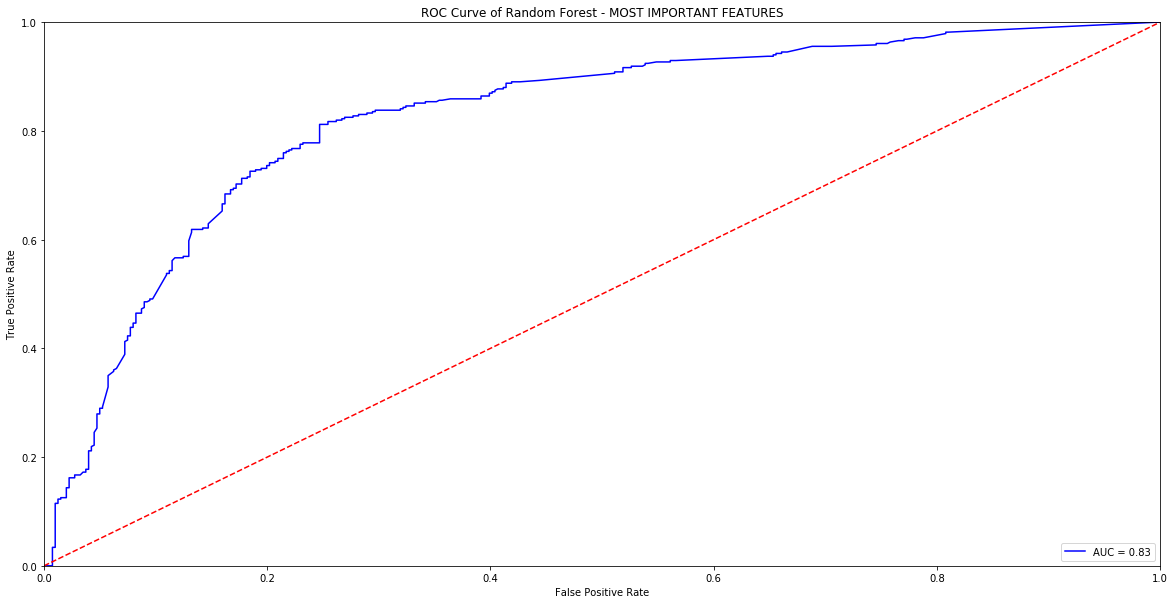

In [20]:
#GRAFICO DE CURVA AUC-ROC
#GRAFICO DE CURVA AUR-ROC PARA MOST-IMPORTANT
#SOLO SE DEBE REEMPLAZAR LOS LABELS Y LAS PREDICCIONES EN roc_curve

fpr, tpr, threshold = roc_curve(test_labels, predictions)
roc_auc = auc(fpr, tpr)
#plt.title('Receiver Operating Characteristic')
plt.figure(figsize=(20,10))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Random Forest - MOST IMPORTANT FEATURES')
plt.show()

Text(0.5,1,u'Variable Importances')

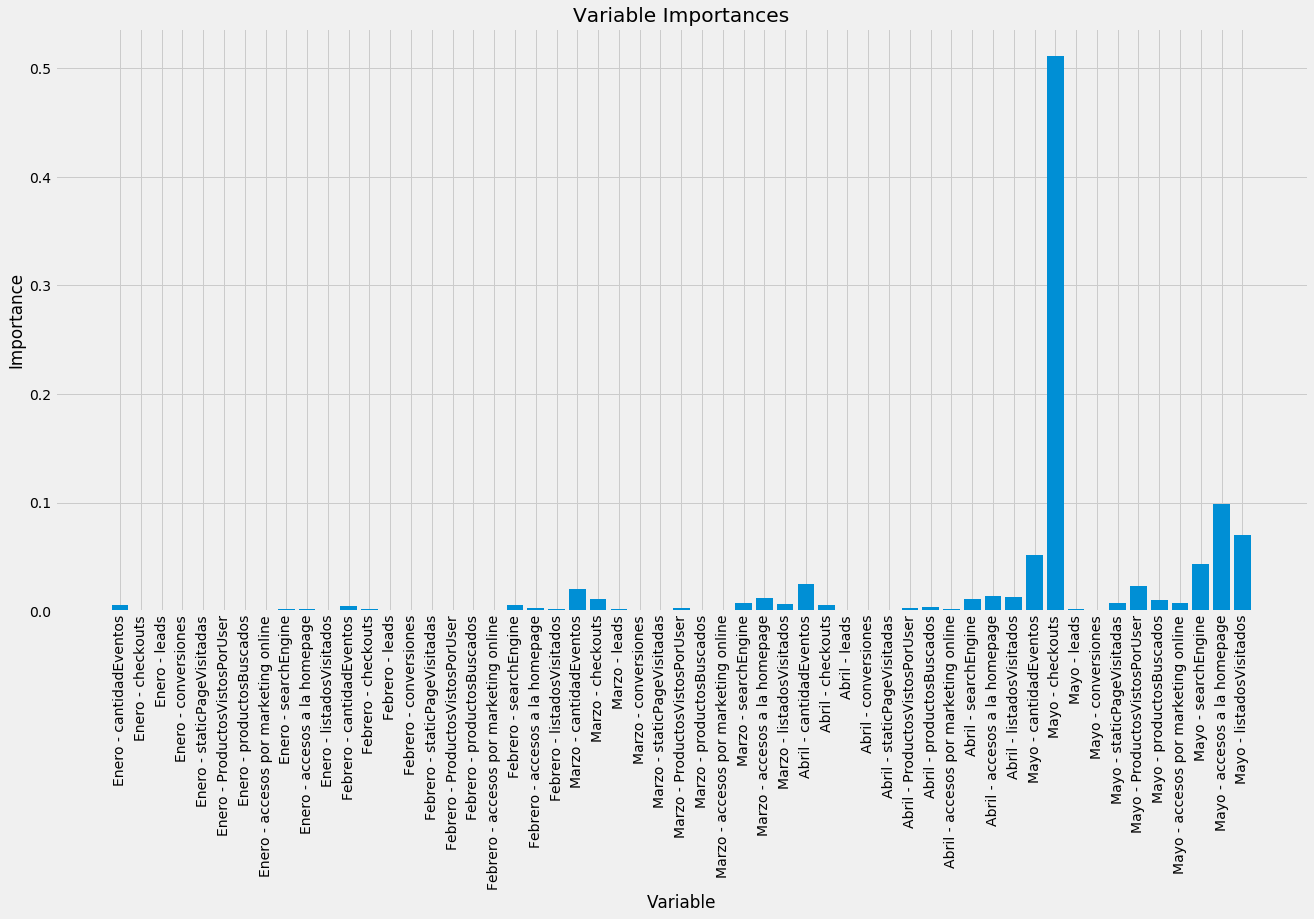

In [21]:
#GRAFICO DE IMPORTANCIA DE LOS FEATURES

# SETEAMOS EL ESTILO
plt.style.use('fivethirtyeight')

plt.figure(figsize=(20,10))

# LISTA DE LOS VALORES DE X PARA PLOTTEAR
x_values = list(range(len(importances)))


# GENERAMOS EL GRAFICO DE BARRAS
plt.bar(x_values, importances, orientation = 'vertical')

# COLOCAMOS LAS ETIQUETAS PARA EL EJE X
plt.xticks(x_values, feature_list, rotation='vertical')

# ETIQUETAS DE EJES Y TITULO
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances')

In [22]:
## TOMAMOS UN ARBOL CUALQUIERA PARA GRAFICARLO EN "tree.png"
tree = rfr.estimators_[5]

# EXPORTAMOS LA IMAGEN A UN ARCHIVO DOT
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# USAMOS EL ARCHIVO DOT PARA CREAR EL GRAFICO
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# GUARDAMOS EL GRAFICO EN EL ARCHIVO PNG
graph.write_png('tree_test3.png')

In [23]:
# TOMAMOS LA IMPORTANCIA NUMERICA DE LOS FEATURES
importances = list(rfr.feature_importances_)

# LISTA DE TUPLAS CON VARIABLE E IMPORTANCIA
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# ORDENO LOS feature importances POR EL MAS IMPORTANTE PRIMERO
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# IMPRIMO EN PANTALLA LOS FEATURES Y SU IMPORTANCIA 
for pair in feature_importances:
    print('FEATURE: {:20} Importance: {}'.format(*pair)) 
    
    

FEATURE: Mayo - checkouts     Importance: 0.51
FEATURE: Mayo - accesos a la homepage Importance: 0.1
FEATURE: Mayo - listadosVisitados Importance: 0.07
FEATURE: Mayo - cantidadEventos Importance: 0.05
FEATURE: Mayo - searchEngine  Importance: 0.04
FEATURE: Marzo - cantidadEventos Importance: 0.02
FEATURE: Abril - cantidadEventos Importance: 0.02
FEATURE: Mayo - ProductosVistosPorUser Importance: 0.02
FEATURE: Enero - cantidadEventos Importance: 0.01
FEATURE: Febrero - searchEngine Importance: 0.01
FEATURE: Marzo - checkouts    Importance: 0.01
FEATURE: Marzo - searchEngine Importance: 0.01
FEATURE: Marzo - accesos a la homepage Importance: 0.01
FEATURE: Marzo - listadosVisitados Importance: 0.01
FEATURE: Abril - checkouts    Importance: 0.01
FEATURE: Abril - searchEngine Importance: 0.01
FEATURE: Abril - accesos a la homepage Importance: 0.01
FEATURE: Abril - listadosVisitados Importance: 0.01
FEATURE: Mayo - staticPageVisitadas Importance: 0.01
FEATURE: Mayo - productosBuscados Import

# PREDECIMOS LOS DATOS DEL TP

In [36]:
rfr

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [24]:
# USAMOS EL MODELO PARA PREDECIR
predictions_test = rfr.predict(T)

In [33]:
predictions_test

array([ 0.13080957,  0.67617692,  0.56014751, ...,  0.70708603,
        0.47604564,  0.13571681])

In [35]:
T_predicciones=pd.DataFrame({'person':features_test_set.iloc[:,0]})
T_predicciones['label']=predictions_test
T_predicciones.to_csv('sub_RF_100000_7.csv', index=False)
T_predicciones.head()

,person,label
0,00091926,0.130810
1,00091a7a,0.676177
2,000ba417,0.560148
3,000e4d9e,0.414021
4,000e619d,0.407975


In [25]:
print feature_importances[0][0]


Mayo - checkouts


# TOMO LOS 2 FEATURES MAS IMPORTANTES PARA PROBAR

In [26]:
# TOMO LOS 2 FEATURES MAS IMPORTANTES

features_most_important=features_under_sample_std.loc[:,[feature_importances[0][0],feature_importances[1][0]]]
most_feature_list=list(features_most_important.columns)
print features_most_important.shape
features_most_important.head()


(1960, 2)


,Mayo - checkouts,Mayo - accesos a la homepage
0,-1.079574,-0.866207
1,0.488571,0.194176
2,-1.079574,-0.866207
3,-1.079574,0.194176
4,-1.079574,-0.866207


In [27]:
# LO CONVIERTO EN UN ARRAY DE NUMPY
features_most_important = np.array(features_most_important)
features_most_important

array([[-1.07957449, -0.86620685],
       [ 0.48857144,  0.19417645],
       [-1.07957449, -0.86620685],
       ..., 
       [ 1.40587801,  1.59592691],
       [ 0.48857144, -0.86620685],
       [ 0.48857144,  1.25455974]])

In [28]:
# INSTANCIO UN NUEVO PARA ESTAS 2 VARIABLES MAS IMPORTANTES
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42, max_depth = 5)

#GENERO EL SPLIT PARA TRAIN Y TEST
train_features_most_important, test_features_most_important, train_labels_most_important, test_labels_most_important = train_test_split(features_most_important,labels,test_size = 0.4,shuffle = False)

#train_test_split(features_most_important, labels, test_size = 0.25, random_state = 42)

#IMPRIMO LAS DIMENSIONES DE LOS ELEMENTOS DE TRAIN Y TEST
print('Training Features Shape:', train_features_most_important.shape)
print('Training Labels Shape:', train_labels_most_important.shape)
print('Testing Features Shape:', test_features_most_important.shape)
print('Testing Labels Shape:', test_labels_most_important.shape)


# ENTRENO EL RANDOM FOREST PARA LOS MAS IMPORTANTES
rf_most_important.fit(train_features_most_important, train_labels_most_important)


# PREDIGO CON DICHO MODELO
predictions_most_important = rf_most_important.predict(test_features_most_important)
predictions_most_important_round= np.around(predictions_most_important)

# GENERAMOS LA MATRIZ DE CONFUSION
most_important_conf_mat = confusion_matrix(test_labels_most_important, np.around(predictions_most_important))

#CORREMOS NUESTRA FUNCION DE EVALUACION
evaluate(most_important_conf_mat,"Accuracy")

print("RECALL: ",recall_score(test_labels_most_important,predictions_most_important_round))

('Training Features Shape:', (1176L, 2L))
('Training Labels Shape:', (1176L,))
('Testing Features Shape:', (784L, 2L))
('Testing Labels Shape:', (784L,))
CONFUSION MATRIX
  TN     FP
  FN     TP
[[306  95]
 [ 92 291]]
Model Performance
Accuracy = 0.7615%.
('RECALL: ', 0.75979112271540472)


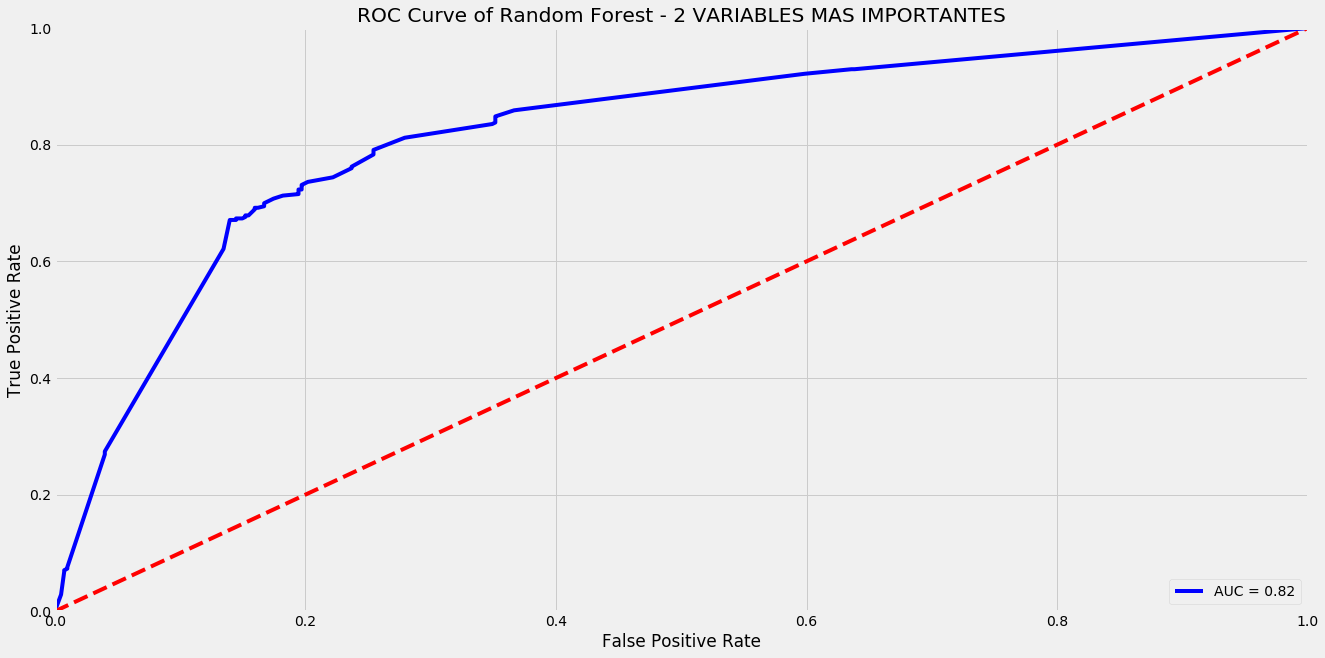

In [29]:
#GRAFICO DE CURVA AUR-ROC PARA MOST-IMPORTANT
#SOLO SE DEBE REEMPLAZAR LOS LABELS Y LAS PREDICCIONES EN roc_curve

fpr, tpr, threshold = roc_curve(test_labels_most_important, predictions_most_important)
roc_auc = auc(fpr, tpr)
#plt.title('Receiver Operating Characteristic')
plt.figure(figsize=(20,10))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Random Forest - 2 VARIABLES MAS IMPORTANTES')
plt.show()

In [30]:
#IMPRESION POR PANTALLA DE IMPORTANCIA NUMERICA DE FEATURES

# TOMAMOS LA IMPORTANCIA NUMERICA
most_importances = list(rf_most_important.feature_importances_)
print most_importances

# LISTA DE TUPLAS CON FEATURE E IMPORTANCIA
feature_most_importances = [(features_most_important, round(most_importance, 2)) for features_most_important, most_importance in zip(most_feature_list, most_importances)]

# ORDENAMOS feature_most_importances POR EL MAS IMPORTANTE PRIMERO
feature_most_importances = sorted(feature_most_importances, key = lambda x: x[1], reverse = True)

# IMPRIMIMOS POR PANTALLA EL FEATURE Y SU IMPORTANCIA 
for pair in feature_most_importances:
    print('FEATURE: {:20} most_Importance: {}'.format(*pair)) 

[0.76926154628702148, 0.23073845371297963]
FEATURE: Mayo - checkouts     most_Importance: 0.77
FEATURE: Mayo - accesos a la homepage most_Importance: 0.23


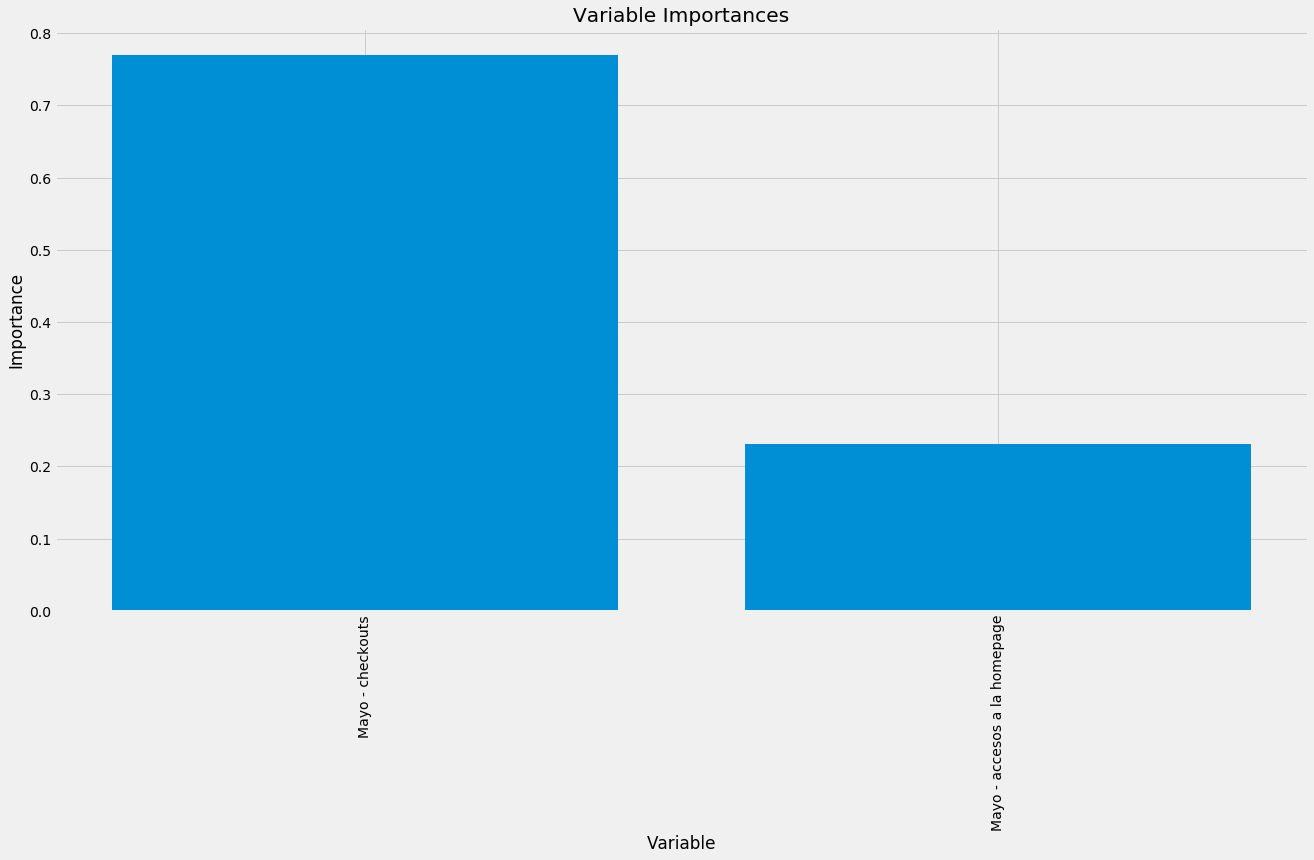

In [31]:
#GRAFICO DE IMPORTANCIA DE LOS FEATURES

# SETEAMOS EL ESTILO
plt.style.use('fivethirtyeight')

plt.figure(figsize=(20,10))

# LISTA DE LOS VALORES DE X PARA PLOTTEAR
x_values = list(range(len(most_importances)))

# GENERAMOS EL GRAFICO DE BARRAS
plt.bar(x_values, most_importances, orientation = 'vertical')

# COLOCAMOS LAS ETIQUETAS PARA EL EJE X
plt.xticks(x_values, most_feature_list, rotation='vertical')

# ETIQUETAS DE EJES Y TITULO
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

CONFUSION MATRIX
  TN     FP
  FN     TP
[[318  83]
 [ 89 294]]
Model Performance
Accuracy = 0.7806%.
('RECALL: ', 0.76762402088772841)


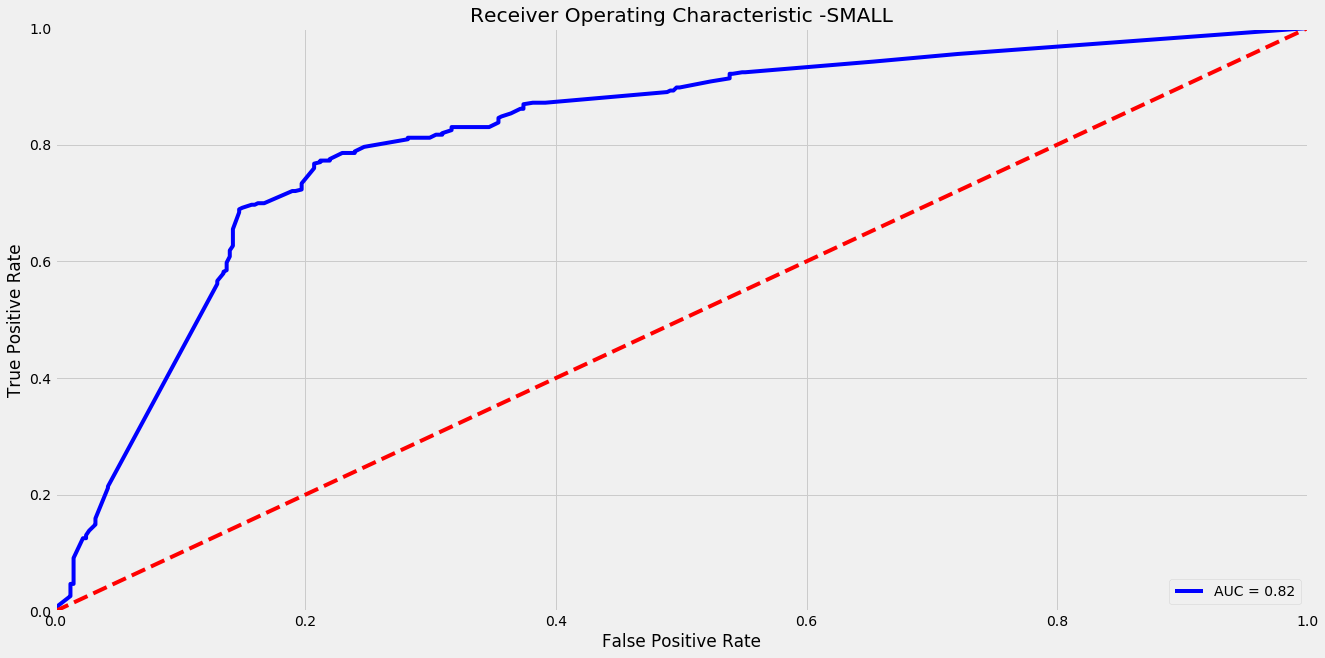

In [32]:
# TOMAMOS UN MODELO PEQUENIO

# LE COLOCAMOS UN LIMITE A LA PROFUNDIDAD DE 3 NIVELES E INSTANCIAMOS 10 ARBOLES
rf_small = RandomForestRegressor(n_estimators=10, random_state=42, max_depth = 3)
rf_small.fit(train_features, train_labels)

# TOMAMOS UN ARBOL CUALQUIERA PARA GRAFICARLO EN "small_tree.png"
tree_small = rf_small.estimators_[5]

# GUARDAMOS EL GRAFICO EN EL ARCHIVO PNG
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree_test3.png');

# USAMOS EL MODELO PARA PREDECIR
small_predictions = rf_small.predict(test_features)
small_predictions_round= np.around(small_predictions)
# GENERAMOS LA MATRIZ DE CONFUSION
small_conf_mat = confusion_matrix(test_labels, np.around(small_predictions))

#CORREMOS NUESTRA FUNCION DE EVALUACION
evaluate(small_conf_mat,"Accuracy")

print("RECALL: ",recall_score(test_labels,small_predictions_round))

#GRAFICO DE CURVA AUC-ROC - SMALL
#GRAFICO DE CURVA AUR-ROC PARA MOST-IMPORTANT
#SOLO SE DEBE REEMPLAZAR LOS LABELS Y LAS PREDICCIONES EN roc_curve

fpr, tpr, threshold = roc_curve(test_labels, small_predictions)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(20,10))
plt.title('Receiver Operating Characteristic -SMALL')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#plt.title('ROC Curve of Random Forest')
plt.show()